In [0]:
import matplotlib.pyplot as plt

# Reading Train-Test zip files from google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip "/content/gdrive/My Drive/dataset_train.zip"

Archive:  /content/gdrive/My Drive/dataset_train.zip
   creating: dataset_train/
   creating: dataset_train/level_1/
   creating: dataset_train/level_1/ta/
 extracting: dataset_train/level_1/ta/c70_127.jpg  
 extracting: dataset_train/level_1/ta/c38_126.jpg  
 extracting: dataset_train/level_1/ta/c90_125.jpg  
 extracting: dataset_train/level_1/ta/c48_124.jpg  
 extracting: dataset_train/level_1/ta/c85_123.jpg  
 extracting: dataset_train/level_1/ta/c21_122.jpg  
 extracting: dataset_train/level_1/ta/c8_121.jpg  
 extracting: dataset_train/level_1/ta/c15_120.jpg  
 extracting: dataset_train/level_1/ta/c92_119.jpg  
 extracting: dataset_train/level_1/ta/c25_118.jpg  
 extracting: dataset_train/level_1/ta/c78_117.jpg  
 extracting: dataset_train/level_1/ta/c62_116.jpg  
 extracting: dataset_train/level_1/ta/c88_115.jpg  
 extracting: dataset_train/level_1/ta/c55_114.jpg  
 extracting: dataset_train/level_1/ta/c4_113.jpg  
 extracting: dataset_train/level_1/ta/c34_112.jpg  
 extracting: d

In [0]:
!unzip "/content/gdrive/My Drive/dataset_test.zip"

# Convert and store each images as dictionary {index:array}

In [0]:
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

     | 481kB 10.5MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-vhvgbu9l/wheels/41/18/ee/d5dd158441b27965855b1bbae03fa2d8a91fe645c01b419896
Successfully built tqdm
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
from tqdm import tqdm_notebook

Understand 2

In [0]:
for i in tqdm_notebook(range(10000000), total=10000000, unit="epoch"):
  x=10000
  y=x*x*x*x*x

/usr/local/lib/python3.6/dist-packages/tqdm/_tqdm_notebook.py:88: TqdmExperimentalWarning: Detect Google Colab 0.0.1a2 and thus load dummy ipywidgets package. Note that UI is different from that in Jupyter. See https://github.com/tqdm/tqdm/pull/640
  " See https://github.com/tqdm/tqdm/pull/640".format(colab.__version__), TqdmExperimentalWarning)


----------------------------------------------------------------------------------------------------------------------

In [0]:
from PIL import Image, ImageFilter
import numpy as np

Understand 1

In [0]:
img= Image.open('index.png')
image_a=np.array(img)          #rows, columns, color channels)
print(image_a[0,0])       # there are 200 rows, 400 columns and each A[i,j] contains [height,width,color]
print(image_a.shape)

------------------------------------------------------------------------------------------------------

In [0]:
import os

In [0]:
def read_all(folder_path,key_prefix=""):
  
  print("reading:")
  
  images={}
  
  files = sorted(os.listdir(folder_path))    # os.listdir is an os independent function that Return a list containing the names of the entries in the directory given by path.
  
  for i,file_name in tqdm_notebook(enumerate(files), total=len(files)):   # enumerate adds a numerical index to files
    print(file_name)
    file_path = os.path.join(folder_path,file_name)   #dataset_train/level_1/background/0.jpg
    
    image_index = key_prefix+file_name[:-4]  #bgr_0
    
    image = Image.open(file_path)
    
    image = image.convert("L") # L mode for black and white
    
    images[image_index] = np.array(image.copy()).flatten()    # Explained in Understand 1
    # copy duplicates the image, so that the original one is retained
    #flatten in a 1d array
    
    image.close() # closes the file pointer Closes the file pointer, if possible. This operation will destroy the image core and release its memory. The image data will be unusable afterward.
    # anyways, a copy of each image is stored in dictionary, so we dont need
  #print(type(images))
  return images

In [0]:
languages = ['ta','hi','en']

images_train = read_all("dataset_train/level_1/background", key_prefix='bgr_')

print(type(images_train))

for language in languages:
  
  images_train.update(read_all("dataset_train/level_1/"+language,key_prefix=language+"_"))

print(len(images_train))

In [0]:
list(images_train.keys())[:5]

['bgr_0', 'bgr_0_d2', 'bgr_0_d3', 'bgr_1', 'bgr_10']

In [0]:
images_test = read_all("dataset_test/kaggle_level_1",key_prefix='')
print(len(images_test))

In [0]:
list(images_test.keys())[:5]

['0', '1', '10', '100', '101']

In [0]:
X_train=[]
Y_train=[]

for key,value in images_train.items():
  
  X_train.append(value)
  if key[:4] == "bgr_" :   # creating Output
    Y_train.append(0)            # set y=0 if its a blank image( bgr images are all blank)
  else:
    Y_train.append(1)

ID_test = []
X_test = []

for key,values in images_test.items():
    
  ID_test.append(int(key))
  print(key)
  X_test.append(values)
  
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)

print(X_train.shape,Y_train.shape)   #(900, 256) (900,)
print(X_test.shape)   #(300, 256)    why 256?  see Understand 3

Understand 3

Each primary color gets 8 bits, or one byte, in the color representation to describe how much of it there is in the color.

8 bits or one byte can store a number between 0 and 255, and no more than that. 255 is the largest number you can store in 8 bits. represented as 11111111 binary or FF hexadecimal.

-----------------------------------------------------------------------------------------------------------------------

In [0]:
print(X_train)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 253 254 ... 255 255 255]
 [255 242 254 ... 255 255 255]
 [255 240 255 ... 255 255 255]]


In [0]:
print(X_test)

[[255 251 255 ... 241 252 254]
 [255 255 255 ... 255 255 255]
 [255 240 252 ... 247 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 231 252 ... 250 255 250]
 [252 254 234 ... 244 249 255]]


# Standardization

In [0]:
from sklearn.preprocessing import StandardScaler  #Scaler  not scalar


scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
scaler = StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
print(X_train_scaled)    #values got scaled to 0-1

[[ 0.20057691  0.23965259  0.27398242 ...  0.22995479  0.20814617
   0.20477449]
 [ 0.20057691  0.23965259  0.27398242 ...  0.22995479  0.20814617
   0.20477449]
 [ 0.20057691  0.23965259  0.27398242 ...  0.22995479  0.20814617
   0.20477449]
 ...
 [ 0.20057691  0.18449664  0.25309076 ...  0.22995479  0.20814617
   0.20477449]
 [ 0.20057691 -0.11886107  0.25309076 ...  0.22995479  0.20814617
   0.20477449]
 [ 0.20057691 -0.17401701  0.27398242 ...  0.22995479  0.20814617
   0.20477449]]


In [0]:
print(X_train)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 253 254 ... 255 255 255]
 [255 242 254 ... 255 255 255]
 [255 240 255 ... 255 255 255]]


# Sigmoid apply algorithm

In [0]:
 
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None


  def grad_w_mse(self, x,y):
    y_pred = self.sigmoid(x)
    #print(y_pred)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  
  def grad_w_ce(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y) * x


  def grad_b_mse(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y) * y_pred * (1 - y_pred)  
 

  def grad_b_ce(self,x,y):
    y_pred = self.sigmoid(x)
    return (y_pred - y)

  def fit(self,X,Y, epochs=1, eta=1,loss_fn = "mse"):
    print("again")
    self.w=np.zeros(X.shape[1])
    self.b=0
    loss={}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        if loss_fn=="mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        
        elif loss_fn=="ce":
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)
        

      self.w = self.w - eta*dw
      self.b = self.b - eta*db
      y_pred=self.sigmoid(X)
      
      if loss_fn == "mse":
        loss[i] = self.compute_loss_mse(Y,y_pred)
        
      elif loss_fn == "ce":
        loss[i] = self.compute_loss_ce(Y,y_pred)
        #print("here")
        if i==500 or i==600 or i==700 or i==800 or i==900 or i==1000 or i==1500 or i==1999 or i==2500 or i==3000 or i==3500 or i==3999 or i==4500 or i==4999 or i==5500 or i==5999 or i==6500 or i==6999 or i==7500 or i==7999 or i==8500 or i==8999 or i==9500 or i==9999:
          print(i, loss[i])
          
        #else:
         # print("did not reach 500 or 1000")

    plt.plot(loss.values(),'*')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    return self.w,self.b


  def sigmoid(self,X):
    return 1/(1 + np.exp(-(np.dot(X,self.w.T) + self.b)))


  def compute_loss(self,Y,Y_pred):
    loss=0
    for y,yp in zip(Y,Y_pred):
      loss += np.power((y-yp),2)
    return loss/len(Y)

  def compute_loss_ce(self,Y,Y_pred):
    loss = 0
    for y,yp in zip(Y,Y_pred):
      loss += -1 * y * np.math.log(yp,2)
    return loss

In [0]:
sn = SigmoidNeuron()


again


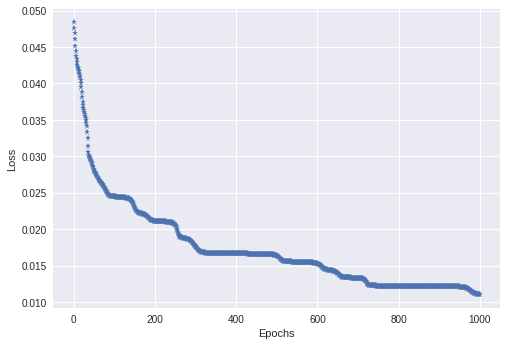

In [0]:
w,b = sn.fit(X_train_scaled,Y_train,epochs = 1000,eta = 0.01)

In [0]:
#w,b = sn.fit(X_train_scaled,Y_train,epochs = 10001,eta = 0.01,loss_fn = "ce")

In [0]:
print(Y_train)

In [0]:
Y_pred=[]
print(w,b)
for x in X_train_scaled:
  Y_pred.append(sn.sigmoid(x))

In [0]:
y_pred = np.array(Y_pred)
print(y_pred)

In [0]:
print(X_test_scaled)

In [0]:
Y_pred_test=[]
#print(w,b)
for x in X_test_scaled:
  #print(x)
  Y_pred_test.append(sn.sigmoid(x))

Y_pred_test = np.array(Y_pred_test)
print(Y_pred_test)

In [0]:
Y_pred_test_binarised = list(map( lambda y: 0 if y<0.5 else 1, Y_pred_test))

In [0]:
print(Y_pred_test)

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]


def print_accuracy(sn):

  Y_pred_train = sn.predict(X_scaled_train)

Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)

print("Train Accuracy : ", accuracy_train)

print("-"*50)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
def print_accuracy(X):
  Y_pred_train = sn.sigmoid(X)
  
  Y_pred_binarised_train = list(map( lambda y:0 if y<0.5 else 1, Y_pred_train))
  
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy :",accuracy_train)

In [0]:
print_accuracy(X_train_scaled)

Train Accuracy : 1.0


In [0]:
print_accuracy(X_train_scaled)

Train Accuracy : 1.0


Y_pred_test = sn_ce.predict(X_scaled_test)

Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()


submission = {}

submission['ImageId'] = ID_test

submission['Class'] = Y_pred_binarised_test


submission = pd.DataFrame(submission)

submission = submission[['ImageId', 'Class']]

submission = submission.sort_values(['ImageId'])

submission.to_csv("submisision.csv", index=False)

In [0]:
import pandas as pd

In [0]:
submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_test_binarised
submission = pd.DataFrame(submission)
submission = submission[['ImageId','Class']]
submission.to_csv("submission_Sigmoid_Text_NonText_third.csv",index=False)
#print(submission)

# MPNeuron

In [0]:
import pandas as pd

In [0]:
X_train_df=pd.DataFrame(X_train)


## Binarisation

In [0]:
X_train_binarised_df = X_train_df.apply(pd.cut, bins=2, labels=[1,0])
Y_train_binarised = Y_train     # y is already binarised

In [0]:
print(X_train_binarised_df)

In [0]:
X_train_binarised = np.array(X_train_binarised_df)
# y is already an array

In [0]:
print(X_train_binarised)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## MPNeuron Class


In [0]:
class MPNeuron:
  def __init__(self):
   
  def fit(X,Y):
    b=0
    max_accuracy=0
    for i in range(X_train_binarised.shape[1]+1):
      accurate_rows=0
      for x,y in zip(X_train_binarised,Y_train_binarised):
        y_pred=(np.sum(x)>=i)
        if y_pred == y:
          accurate_rows+=1
      accuracy=(accurate_rows/X_train_binarised.shape[0])
      print(i,accuracy)

      #print(accuracy)
      if accuracy>max_accuracy:
        max_accuracy=accuracy
        b=i

    print(b, max_accuracy)

## Applying on test data

In [0]:
X_test_df=pd.DataFrame(X_test)
X_test_binarised_df = X_test_df.apply(pd.cut, bins=2, labels=[1,0])


In [0]:
X_test_binarised = np.array(X_test_binarised_df)

In [0]:
b=3
y_test_mpn=[]
for x in zip(X_test_binarised):
  
  y_pred=int(np.sum(x)>=b)
  #print(np.sum(x),b, y_pred)
  y_test_mpn.append(y_pred)

## Submission

In [0]:
submission = {}
submission['ImageId'] = ID_test
submission['Class'] = y_test_mpn
submission = pd.DataFrame(submission)
submission = submission[['ImageId','Class']]
submission.to_csv("submission_mpn_second.csv",index=False)
#print(submission)

# perceptron

In [0]:
class Perceptron:
  
  
  final_w = None
  final_b = None
  
  
  def fit(self,X,Y,b=0,lr=1,epochs=1):
    accuracy_list={}
    w=np.zeros(X.shape[1])
    max_accuracy=0
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      for x,y in zip(X,Y):

        y_pred=np.dot(x,w.T)

        if y_pred<b and y==1:
          w = w + x*lr
          b = b - 1*lr


        elif y_pred>=b and y==0:
          w = w - x*lr
          b = b + 1*lr



      y_train_pred = predict_train(X,w,b)


      accuracy=accuracy_score(Y_train,y_train_pred)
      #print(accuracy, w, b)
      accuracy_list[epoch]=accuracy

      if accuracy>max_accuracy:
        max_accuracy=accuracy
        self.final_b=b
        self.final_w=w

    plt.plot(accuracy_list.values(),'*')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

    return max_accuracy
  
  
  
  
  def predict(self,X):
    
    y_pred=[]

    for x in X:

        y=int(np.dot(x,self.final_w.T)>=self.final_b)

        y_pred.append(y)
      
    return y_pred

  
def predict_train(X,w,b):
    
    y_pred=[]

    for x in X:

        y=int(np.dot(x,w.T)>=b)

        y_pred.append(y)
      
    return y_pred  
  

In [0]:
pr = Perceptron()

In [0]:
from sklearn.metrics import accuracy_score

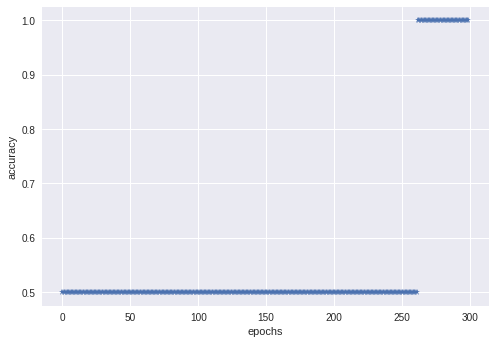

1.0


In [0]:
accuracy= pr.fit(X_train,Y_train,0,0.01,300)
print(accuracy)

In [0]:
Y_test_perceptron = pr.predict(X_test)

In [0]:
import pandas as pd

In [0]:
submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_test_perceptron
submission = pd.DataFrame(submission)
submission = submission[['ImageId','Class']]
submission.to_csv("submission_perceptron_level_1_first.csv",index=False)
#print(submission)